***Use the Twitter Data and perform sentiment Analysis on that data using one of the  scikit learn classifier for text.***

Importing pandas for loading the Data Set

In [183]:
#Importing Pandas to read and load the dataset into the program
import pandas as pd

Reading the data from the source(Twitter) using Pandas

In [184]:
#Reading the Data using pandas
Tweet_Data = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv")

Displaying the loaded Data

In [185]:
Tweet_Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


***Preprocessing of Data***

Removing the twitter handles(@user) and numericals from the tweet column of the data

In [186]:
#Removing the numericals and twitter handles(@user)
Tweet_Data['tweet'] = Tweet_Data.tweet.str.replace('@[A-Za-z0-9]+', '')
Tweet_Data


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"#sikh #temple vandalised in in #calgary, #wso..."


Removing Hashes(#) from the tweet column of the data

In [187]:
#Removing hashes(#) from the tweets
Tweet_Data['tweet'] = Tweet_Data.tweet.str.replace('#', '')
Tweet_Data

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i can't use cause the...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide: society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"sikh temple vandalised in in calgary, wso con..."


Removing other special characters and symbols from the tweet column of the data

In [188]:
#Removing other special characters and symbols from the tweets
Tweet_Data['tweet'] = Tweet_Data.tweet.str.encode("ascii", "ignore").str.decode("utf-8")
Tweet_Data

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i can't use cause the...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide: society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu?
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"sikh temple vandalised in in calgary, wso con..."


Removing punctuations(?) from the tweet column of the data

In [189]:
Tweet_Data['tweet'] = Tweet_Data.tweet.str.replace('[^\w\s]', '')
Tweet_Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,sikh temple vandalised in in calgary wso cond...


Removing Stop Words



***Stop Words:***The words which are very common in the text in any language and do not add any meaning to the text

In [191]:
#Importing and creating an object for stopwords library so as to remove stopwords from the data
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
Stop_Words = stopwords.words("english")
print(Stop_Words)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Creating Objects of SnowBallStemmer and WordNetLemmatizer

***Stemming:***Reducing the word to thier base word forms




























***Lemmatization***:Same like stemming but is more powerful and gives meaningful base words by following some rules 

In [192]:
#Importing and Creating objects for SnowBall stemmer and WordNet Lemmatizer for performing stemming and lemmatization on the data
from nltk.stem import SnowballStemmer
sb = SnowballStemmer("english")
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

Writing a function to filter tweet column in data by tokenizing and removing stop words and performing stemming 

In [194]:
#User Defined Function to remove stopwords and performing stemming and lemmatization
from nltk.tokenize import word_tokenize
def Rem_StopWords_stem(t):
  text = word_tokenize(t)
  l0 = []
  for k in text:
    if k.isalpha():
      l0.append(k.lower())
  l1 = []
  for w in l0:
    if w not in Stop_Words:
      l1.append(w)
  l2 = []
  l3 = []
  for w in l1:
    f = sb.stem(w)
    l2.append(f)
  #for p in l2:
    #h = lemmatizer(p,pos='v')
    #l3.append(h)

  return " ".join(l2)


Applying the function to the tweet column in the data

In [195]:
#Applying the Function(Rem_StopWords_stem) to tweet column of data
Tweet_Data['tweet'] = Tweet_Data['tweet'].apply(Rem_StopWords_stem)
Tweet_Data

,id,label,tweet
0,1,0,father dysfunct selfish drag kid dysfunct run
1,2,0,thank lyft credit cant use caus dont offer whe...
2,3,0,bihday majesti
3,4,0,model love u take u time ur
4,5,0,factsguid societi motiv
...,...,...,...
31957,31958,0,ate isz youuu
31958,31959,0,see nina turner airwav tri wrap mantl genuin h...
31959,31960,0,listen sad song monday morn otw work sad
31960,31961,1,sikh templ vandalis calgari wso condemn act


Converting the data into binary format to make machine understand the data. So we used TfidfVectorizer.



































***Tfidf Vectorizer:***It learns the vocabulary and tokenize the words and highlights words that are more interesting i.e.,words with high frequency

In [196]:
#Applying Tfidf vectors on the data
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(max_features=15000,ngram_range=(1,2))
h = Tweet_Data['tweet']
i =vector.fit_transform(h)
print(i)

  (0, 11404)	0.2394347019202803
  (0, 7236)	0.22644685129830222
  (0, 3443)	0.3248626624224705
  (0, 11786)	0.3415693515104111
  (0, 3545)	0.7968741209833876
  (0, 4166)	0.18487593416376708
  (1, 1887)	0.38500181384531706
  (1, 13989)	0.3664671246220172
  (1, 14563)	0.3938015254186717
  (1, 9732)	0.2958087235829827
  (1, 3359)	0.18984645567055156
  (1, 1886)	0.2680656641606504
  (1, 13959)	0.22050552444915197
  (1, 1763)	0.1848120334728906
  (1, 2615)	0.33448792573056635
  (1, 8313)	0.37781192597294627
  (1, 13012)	0.17201724509116728
  (2, 1186)	0.6740696760580689
  (2, 8369)	0.6509703021799566
  (2, 1151)	0.34909559936886364
  (3, 13379)	0.3649078807257563
  (3, 12879)	0.36254622523531566
  (3, 8220)	0.3649078807257563
  (3, 8869)	0.3649078807257563
  (3, 13920)	0.3450199967770635
  :	:
  (31959, 11455)	0.40714170058452154
  (31959, 9984)	0.4148897439207149
  (31959, 8906)	0.38991081859678856
  (31959, 7857)	0.264043130808687
  (31959, 12352)	0.27358707167622565
  (31959, 14776)	0.20

***POS tagging:*** It is a process of marking up the words in a text to a particular part of speech(like noun,verb,adjective,etc) based on its definition and context

In [197]:
#POS tagging
text = Tweet_Data.tweet
t = pd.Series(text.head(100)).to_string()
words = word_tokenize(t)
for w in words:
  tagged_words = nltk.pos_tag(words)
tagged_words
    
    

[('0', 'CD'),
 ('father', 'NN'),
 ('dysfunct', 'JJ'),
 ('selfish', 'JJ'),
 ('drag', 'NN'),
 ('kid', 'NN'),
 ('dysfunct', 'JJ'),
 ('run', 'NN'),
 ('1', 'CD'),
 ('thank', 'NN'),
 ('lyft', 'NN'),
 ('credit', 'NN'),
 ('cant', 'NN'),
 ('use', 'NN'),
 ('caus', 'NN'),
 ('dont', 'NN'),
 ('offer', 'NN'),
 ('whe', 'NN'),
 ('...', ':'),
 ('2', 'CD'),
 ('bihday', 'JJ'),
 ('majesti', 'VBD'),
 ('3', 'CD'),
 ('model', 'NN'),
 ('love', 'NN'),
 ('u', 'JJ'),
 ('take', 'VB'),
 ('u', 'JJ'),
 ('time', 'NN'),
 ('ur', 'JJ'),
 ('4', 'CD'),
 ('factsguid', 'NN'),
 ('societi', 'NN'),
 ('motiv', 'VBZ'),
 ('5', 'CD'),
 ('huge', 'JJ'),
 ('fan', 'NN'),
 ('fare', 'NN'),
 ('big', 'JJ'),
 ('talk', 'NN'),
 ('leav', 'VBZ'),
 ('chao', 'JJ'),
 ('pay', 'NN'),
 ('disput', 'NN'),
 ('ge', 'NN'),
 ('...', ':'),
 ('6', 'CD'),
 ('camp', 'NN'),
 ('tomorrow', 'NN'),
 ('danni', 'VBZ'),
 ('7', 'CD'),
 ('next', 'JJ'),
 ('school', 'NN'),
 ('year', 'NN'),
 ('year', 'NN'),
 ('exam', 'VBP'),
 ('cant', 'NN'),
 ('think', 'VBP'),
 ('school',

Computing frequency of each word in the tweet column

In [198]:
#Finding the frequency of each word
from nltk.probability import FreqDist
Frequency = FreqDist(words)
Frequency


FreqDist({'...': 44,
          '0': 1,
          '1': 1,
          '10': 1,
          '11': 1,
          '12': 1,
          '13': 1,
          '14': 1,
          '15': 1,
          '16': 1,
          '17': 1,
          '18': 1,
          '19': 1,
          '2': 1,
          '20': 1,
          '21': 1,
          '22': 1,
          '23': 1,
          '24': 1,
          '25': 1,
          '26': 1,
          '27': 1,
          '28': 1,
          '29': 1,
          '3': 1,
          '30': 1,
          '31': 1,
          '32': 1,
          '33': 1,
          '34': 1,
          '35': 1,
          '36': 1,
          '37': 1,
          '38': 1,
          '39': 1,
          '4': 1,
          '40': 1,
          '41': 1,
          '42': 1,
          '43': 1,
          '44': 1,
          '45': 1,
          '46': 1,
          '47': 1,
          '48': 1,
          '49': 1,
          '5': 1,
          '50': 1,
          '51': 1,
          '52': 1,
          '53': 1,
          '54': 1,
          '55': 

Graphical depection of first five frequent words

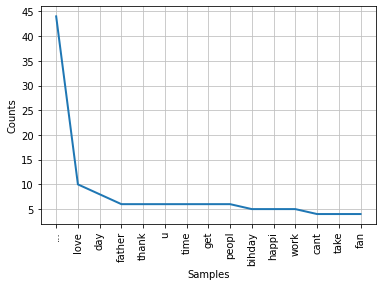

In [199]:
#Diagramatic representation of word frequency
Frequency.plot(15)

Usage of **WordCloud** and representing all the filtered words in a diagramatic manner

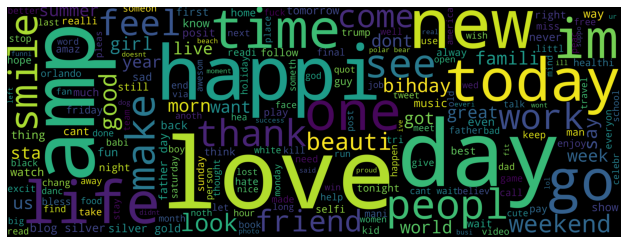

In [200]:
#Creating an image for all the words in the tweet data
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import requests
import numpy as np
from PIL import Image
Sent = ''.join(set([p for p in Tweet_Data['tweet']]))
WC = WordCloud(background_color='black', height=1500, width=4000).generate(Sent)
plt.figure(figsize = (11, 11)) 
plt.imshow(WC) 

#To remove the axis value :
plt.axis("off") 
plt.show()


Representing all the **positive words** in a twitter logo in a beautiful manner by adjusting size and colors

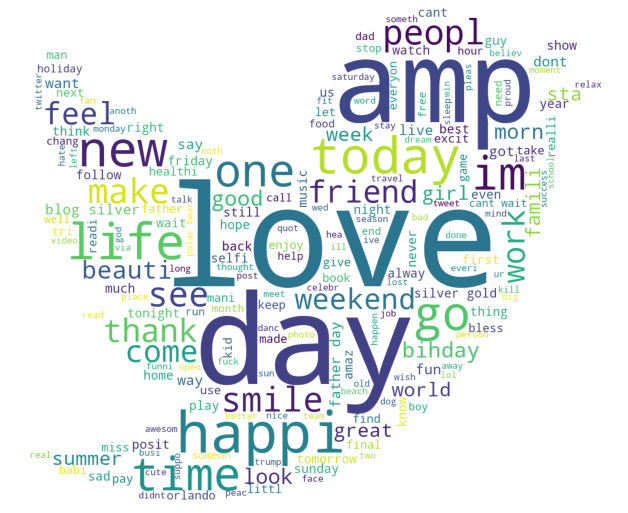

In [201]:
#Visualizing Positive Sentiment Data words
M = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
Pos_sent =''.join(set([p for p in Tweet_Data['tweet'][Tweet_Data['label']==0]]))
WC = WordCloud(background_color='white', height=1500, width=4000,mask=M).generate(Pos_sent)
plt.figure(figsize = (11, 11)) 
plt.imshow(WC) 

#To remove the axis value :
plt.axis("off") 
plt.show()

Representing all the **negative words** in a twitter logo in a beautiful manner by adjusting size and colors

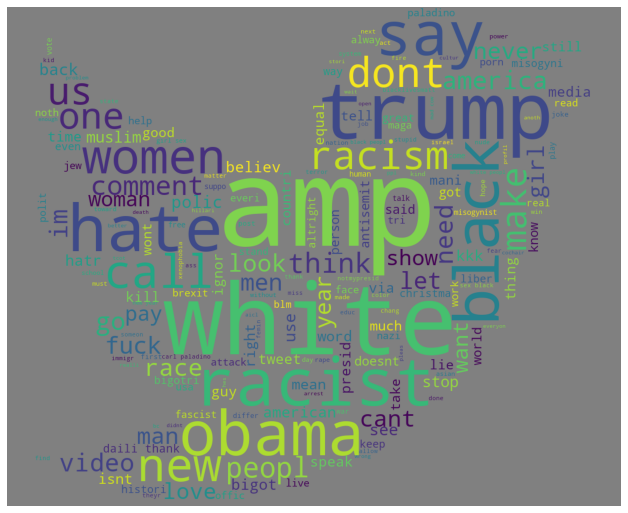

In [202]:
#Visualizing Negative Sentiment Data words
M = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
Neg_sent = ''.join(set([p for p in Tweet_Data['tweet'][Tweet_Data['label']==1]]))
wordcloud = WordCloud(background_color='grey', height=800, width=4000,mask = M).generate(Neg_sent)
plt.figure(figsize = (11, 11)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

Representing occurences of number of words in each tweet

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


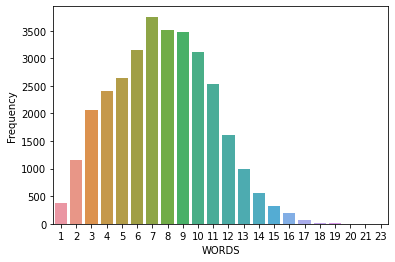

In [203]:
#Visualizing the occurences of number of words in the tweet
import seaborn as sns
Tweet_Data['Count_Words'] = Tweet_Data['tweet'].apply(lambda a:len(a.split(' ')))
No_of_words = Tweet_Data['Count_Words'].value_counts()
sns.barplot(No_of_words.index,No_of_words.values)
plt.xlabel('WORDS')
plt.ylabel('Frequency')
plt.show()

Splitting the data into training and test sets

In [204]:
#Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
j = Tweet_Data['label']
i1_train, i1_test, j1_train, j1_test = train_test_split(i, j, test_size=0.2, random_state=0)

Trining the model using LinearSvc

In [205]:
#training the model using LinearSVC algorithm
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(i1_train,j1_train)


LinearSVC()

Calculating the predicted value

In [206]:
j_eval = clf.predict(i1_test)

Computing the mean_squared_error to get the deviation from actual value and predicted value

In [207]:
#Calculating mean squared error
from sklearn.metrics import mean_squared_error
p = (mean_squared_error(j1_test,j_eval)/100)**(1/2)
print(p)

0.018466130253138792


Depecting the efficiency and accuracy of the model

In [208]:
#Depecting the metrics like accuracy,f1 score of the model
from sklearn.metrics import classification_report
Result = classification_report(j1_test,j_eval)
print(Result)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5985
           1       0.82      0.59      0.69       408

    accuracy                           0.97      6393
   macro avg       0.90      0.79      0.84      6393
weighted avg       0.96      0.97      0.96      6393



Checking the model by giving a sample positive test case

In [210]:
#sample1
text = "I like my Daddy soo much"
t = vector.transform([text])
l= clf.predict(t)
print(l[0])

0


Checking the model by giving a sample positive test case

In [211]:
#sample2
text2 = "I hate you"
t2 = vector.transform([text2])
l = clf.predict(t2)
print(l[0])

1
